In [1]:
# Add directory above current directory to path
import sys as SYS; SYS.path.insert(0, '..')

# for saving
import os

from collections import defaultdict
import numpy as np
import matplotlib.pyplot as plt

from src import setup
# setup.use_gpu()

In [2]:
from src import ( 
    measurements as measure,
    density_matrix as DM,
    simulation as sim,
    orders,
    order_rules,
    random_unitary,
    simulation)

from Scripts import simulation_CLI as cleo

In [3]:
Trials = 2
for unitary_seed in range(Trials):
    initial_pops = [0.1,.12,.22, .32, .42, .4, .25, .23]
    system = DM.n_thermal_qbits(initial_pops)
    connectivity = "c5"
    unitary_energy_subspace = 1
    ordering_seed = 1
    chunk_size = 2
    order_rule_name = "greedy"
    num_steps = 50
    data = cleo.execute(file_name="greedy",
                       connectivity=connectivity,
                       order_rule_name = order_rule_name, 
                       unitary_seed=unitary_seed,
                       unitary_energy_subspace=unitary_energy_subspace,
                       evolution_generation_type="haar2Qunitary",
                       chunk_size=chunk_size,
                       num_steps=num_steps,
                       initial_pops=initial_pops,
                       verbosity = .9)

90%
simulation complete, extracting and saving data to : ../data/greedy/greedy-8_qubits-c5_connectivity-unitary_energy_subspace_1-unitary_seed_0-order_rule_name_greedy
simulation complete, extracting and saving data to : ../data/greedy/greedy-8_qubits-c5_connectivity-unitary_energy_subspace_1-unitary_seed_0-order_rule_name_greedy
simulation complete, extracting and saving data to : ../data/greedy/greedy-8_qubits-c5_connectivity-unitary_energy_subspace_1-unitary_seed_0-order_rule_name_greedy
90%
simulation complete, extracting and saving data to : ../data/greedy/greedy-8_qubits-c5_connectivity-unitary_energy_subspace_1-unitary_seed_1-order_rule_name_greedy
simulation complete, extracting and saving data to : ../data/greedy/greedy-8_qubits-c5_connectivity-unitary_energy_subspace_1-unitary_seed_1-order_rule_name_greedy
simulation complete, extracting and saving data to : ../data/greedy/greedy-8_qubits-c5_connectivity-unitary_energy_subspace_1-unitary_seed_1-order_rule_name_greedy


In [4]:
Trials = 2
for unitary_seed in range(Trials):
    initial_pops = [0.1,.12,.22, .32, .42, .4, .25, .23]
    system = DM.n_thermal_qbits(initial_pops)
    connectivity = "c5"
    unitary_energy_subspace = 1
    ordering_seed = 1
    chunk_size = 2
    order_rule_name = "random"
    num_steps = 50
    data = cleo.execute(file_name="random",
                       connectivity=connectivity,
                       order_rule_name = order_rule_name, 
                       unitary_seed=unitary_seed,
                       unitary_energy_subspace=unitary_energy_subspace,
                       evolution_generation_type="haar2Qunitary",
                       chunk_size=chunk_size,
                       num_steps=num_steps,
                       initial_pops=initial_pops,
                       verbosity = .9)

90%
simulation complete, extracting and saving data to : ../data/random/random-8_qubits-c5_connectivity-unitary_energy_subspace_1-unitary_seed_0-order_rule_name_random
simulation complete, extracting and saving data to : ../data/random/random-8_qubits-c5_connectivity-unitary_energy_subspace_1-unitary_seed_0-order_rule_name_random
simulation complete, extracting and saving data to : ../data/random/random-8_qubits-c5_connectivity-unitary_energy_subspace_1-unitary_seed_0-order_rule_name_random
90%
simulation complete, extracting and saving data to : ../data/random/random-8_qubits-c5_connectivity-unitary_energy_subspace_1-unitary_seed_1-order_rule_name_random
simulation complete, extracting and saving data to : ../data/random/random-8_qubits-c5_connectivity-unitary_energy_subspace_1-unitary_seed_1-order_rule_name_random
simulation complete, extracting and saving data to : ../data/random/random-8_qubits-c5_connectivity-unitary_energy_subspace_1-unitary_seed_1-order_rule_name_random


In [5]:
import sys as SYS; SYS.path.insert(0, '../..')
from Scripts import hdf5merge
hdf5merge.merge_hdf5_files("../data/greedy")

In [6]:
import sys as SYS; SYS.path.insert(0, '../..')
from Scripts import hdf5merge
hdf5merge.merge_hdf5_files("../data/random")

In [7]:
import matplotlib.pyplot as plt 
import matplotlib.animation as animation
# Add directory above current directory to path
import sys as SYS; SYS.path.insert(0, '../..')
import h5py
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from src import ket as ket
from src import density_matrix as DM

In [8]:
newdata1 = dict(h5py.File("../data/greedy/greedy.hdf5"))

In [9]:
newdata2 = dict(h5py.File("../data/random/random.hdf5"))

In [10]:
def get_pops(data, n_qubits, connectivity,update_rule):
    #dimension 0 is each trial
    #dimension 1 is each time step
    #dimension 2 is each qubit
    result = []
    for trial in data[f'{n_qubits} qubits'][f'{connectivity} connectivity']['unitary energy subspace 1']:
        seed = trial.split(' ')[-1]
        dat = dict(data[f'{n_qubits} qubits'][f'{connectivity} connectivity']['unitary energy subspace 1'][f'unitary seed {seed}'][f'ordering seed {update_rule}']['pops'])
        dat = {int(k.split('(')[0]): dat[k] for k in dat}
        dat = np.array([np.array([dat[k][subkey][()] for subkey in sorted(dat[k])]) for k in sorted(dat)])
        result.append(dat)
    return(np.array(result))

def get_2_qbit_dms(data, n_qubits, connectivity,update_rule):
    basis = ket.canonical_basis(2)
    #dimension 0 is each trial
    #dimension 1 is each time step (recall that sampling step is 5 by default)
    #dimension 2 is qubit pair
    #dimension 3 and 4 is the 2 qubit density matrix
    result = []
    
    def to_tuple(string):
        tuple_elements = string.strip('()').split(',')
        return tuple(int(elem.strip()) for elem in tuple_elements)

    for trial in data[f'{n_qubits} qubits'][f'{connectivity} connectivity']['unitary energy subspace 1']:
        seed = trial.split(' ')[-1]
        dat = dict(data[f'{n_qubits} qubits'][f'{connectivity} connectivity']['unitary energy subspace 1'][f'unitary seed {seed}'][f'ordering seed {update_rule}']['two_qubit_dms'])
        dat = {int(k.split('(')[0]): dat[k] for k in dat}
        
        dat = np.array([{to_tuple(subkey):DM.DensityMatrix(dat[k][subkey],basis) for subkey in sorted(dat[k])} for k in sorted(dat)])
        result.append(dat)
    return(np.array(result))

def get_3_qbit_dms(data, n_qubits, connectivity,update_rule):
    basis = ket.canonical_basis(3)
    #dimension 0 is each trial
    #dimension 1 is each time step (recall that sampling step is 5 by default)
    #dimension 2 is qubit triplet
    #dimension 3 and 4 is the 3 qubit density matrix
    result = []
    
    def to_tuple(string):
        tuple_elements = string.strip('()').split(',')
        return tuple(int(elem.strip()) for elem in tuple_elements)

    for trial in data[f'{n_qubits} qubits'][f'{connectivity} connectivity']['unitary energy subspace 1']:
        seed = trial.split(' ')[-1]
        dat = dict(data[f'{n_qubits} qubits'][f'{connectivity} connectivity']['unitary energy subspace 1'][f'unitary seed {seed}'][f'ordering seed {update_rule}']['three_qubit_dms'])
        dat = {int(k.split('(')[0]): dat[k] for k in dat}
        
        dat = np.array([{to_tuple(subkey):DM.DensityMatrix(dat[k][subkey],basis) for subkey in sorted(dat[k])} for k in sorted(dat)])
        result.append(dat)
    return(np.array(result))

In [11]:
twoQdmsgreedy = get_2_qbit_dms(newdata1,8,"c5","greedy")

In [12]:
twoQdmsrandom = get_2_qbit_dms(newdata2,8,"c5","random")

In [13]:
popsgreedy = get_pops(newdata1,8,"c5","greedy")

In [14]:
popsrandom = get_pops(newdata2,8,"c5","random")

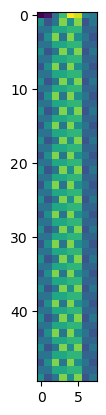

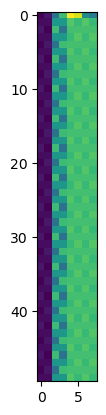

IndexError: index 2 is out of bounds for axis 0 with size 2

In [15]:
for i in range(5):
    plt.imshow(popsgreedy[i], interpolation='none')
    plt.show()

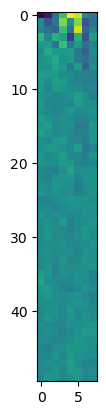

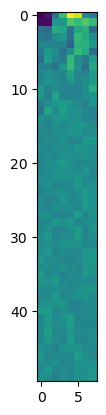

In [16]:
for i in range(2):
    plt.imshow(popsrandom[i], interpolation='none')
    plt.show()

In [17]:
def tz_two_q_dyns_map(pops_trial_index): 
    tz = []
    np.array(pops_trial_index)
    for step_index in range(steps):
        tzi = pops_trial_index[step_index + 1 ] - np.cos(np.pi / 4)*np.cos(np.pi / 4)* pops_trial_index[step_index]
        tz.append(tzi)
    return tz

In [41]:
steps = 49
tz_two_q_dyns_map(popsgreedy[1])

[array([0.05999998, 0.04999998, 0.15999998, 0.10999998, 0.12499997,
        0.11499998, 0.20999995, 0.19999997], dtype=float32),
 array([0.06499998, 0.04499999, 0.18499994, 0.08499998, 0.15749994,
        0.16749994, 0.15749995, 0.16749994], dtype=float32),
 array([0.04999997, 0.05999997, 0.10999995, 0.15999994, 0.15249994,
        0.17249995, 0.15249994, 0.17249992], dtype=float32),
 array([0.04499998, 0.06499998, 0.08499996, 0.18499991, 0.16749991,
        0.15749991, 0.16749991, 0.15749995], dtype=float32),
 array([0.05999997, 0.04999997, 0.15999994, 0.10999995, 0.17249992,
        0.15249994, 0.17249992, 0.15249993], dtype=float32),
 array([0.06499997, 0.04499998, 0.18499987, 0.08499995, 0.15749991,
        0.1674999 , 0.15749991, 0.1674999 ], dtype=float32),
 array([0.04999996, 0.05999995, 0.10999995, 0.1599999 , 0.1524999 ,
        0.17249988, 0.1524999 , 0.17249988], dtype=float32),
 array([0.04499996, 0.06499996, 0.08499993, 0.18499982, 0.16749984,
        0.15749985, 0.1674998

In [20]:
steps = 49
tz_two_q_dyns_map(popsrandom[1])

[array([0.05999998, 0.04999998, 0.15999998, 0.10999998, 0.12499997,
        0.11499998, 0.20999995, 0.19999997], dtype=float32),
 array([0.16749994, 0.15749997, 0.16749993, 0.15749994, 0.05499998,
        0.13499995, 0.13499995, 0.05499998], dtype=float32),
 array([0.11809996, 0.11289997, 0.10624997, 0.12374996, 0.10459997,
        0.16874994, 0.14439999, 0.15124995], dtype=float32),
 array([0.13154891, 0.13499993, 0.11187598, 0.10957496, 0.09436917,
        0.14782496, 0.15749991, 0.14230573], dtype=float32),
 array([0.10623795, 0.14771241, 0.1371869 , 0.09686246, 0.1563528 ,
        0.16233742, 0.14298744, 0.08032206], dtype=float32),
 array([0.10033821, 0.1430063 , 0.12074354, 0.12391163, 0.18525645,
        0.10099337, 0.08804122, 0.16770856], dtype=float32),
 array([0.13322893, 0.10184155, 0.09902436, 0.15390486, 0.15799662,
        0.12825316, 0.09791678, 0.15783304], dtype=float32),
 array([0.12925214, 0.14076743, 0.14145294, 0.10979705, 0.12793243,
        0.11986548, 0.1334518

In [21]:
#plot 2 lists a function of time
def plot_lists_as_function_of_time(list1, list2):
    # Assuming both lists have the same length (representing time steps)
    time_steps = range(1, len(list1) + 1)
    
    # Plotting the lists
    plt.plot(time_steps, list1, label='Greedy')
    plt.plot(time_steps, list2, label='Random')

    
    # Adding labels and title
    plt.xlabel('Time Step')
    plt.ylabel('Value')
    plt.title('shift vector for the qubits as a function of Time Step')
    
    # Adding legend
    plt.legend()
    
    # Display the plot
    plt.grid(True)
    plt.show()


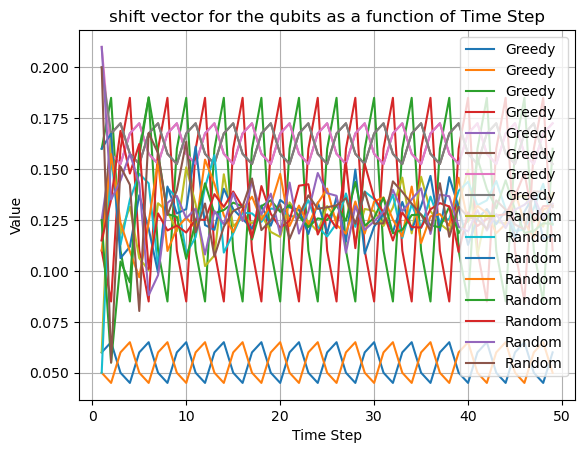

In [22]:
plot_lists_as_function_of_time(tz_two_q_dyns_map(popsgreedy[1]),tz_two_q_dyns_map(popsrandom[1]))

In [23]:

# Initialize an empty 2D array to store mean and std
mean_std_array = []

# Loop through each sim_index
for sim_index in popsgreedy:
    # Create an empty list to store mean and std for this sim_index
    sim_mean_std = []
    
    # Loop through each time_step in the sim_index
    for time_step in sim_index:
        listr = []
        # appending all the values in the list
        for value in time_step.values():
            listr.append(value)
        # calculating standard deviation using np.std
        stds = np.std(listr)
        means = np.mean(listr)
        
        # Append mean and std to the list for this time step
        sim_mean_std.append([means, stds])
    
    # Append the list for this sim_index to the 2D array
    mean_std_array.append(sim_mean_std)

# Convert the list of lists to a numpy array
mean_std_array = np.array(mean_std_array)

# Extract standard deviation and mean values for each simulation
stds_greedy = mean_std_array[:, :, 1]
means_greedy = mean_std_array[:, :, 0]

# Create x-axis values (time steps)
time_steps = np.arange(1, stds_greedy.shape[1] + 1)

# Plot standard deviation for each simulation
plt.figure(figsize=(10, 5))
for sim_idx in range(len(stds_greedy)):
    plt.plot(time_steps, stds_greedy[sim_idx], '-o', label=f'Sim {sim_idx + 1} Std')

plt.xlabel('Time Step')
plt.ylabel('Standard Deviation')
plt.title('Standard Deviation Over Time')
plt.legend()
filename = f"SD_MI_different_greedy_all_sim_index.png"
plt.savefig(filename)
plt.grid(True)
plt.show()

# Plot mean for each simulation
plt.figure(figsize=(10, 5))
for sim_idx in range(len(means_greedy)):
    plt.plot(time_steps, means_greedy[sim_idx], '--', label=f'Sim {sim_idx + 1} Mean')

plt.xlabel('Time Step')
plt.ylabel('Mean')
plt.title('Mean Over Time')
plt.legend()
filename = f"Mean_MI_different_greedy_all_sim_index.png"
plt.savefig(filename)
plt.grid(True)
plt.show()

AttributeError: 'numpy.ndarray' object has no attribute 'values'

In [24]:
def means_stds_of_pops_of_one_sim_index(pops,trial_index):
    mean_stds_list = []
    for step_index in range(steps):
        stds = np.std(pops[trial_index][step_index])
        means = np.mean(pops[trial_index][step_index])
        mean_stds_list.append([means, stds])
    return mean_stds_list

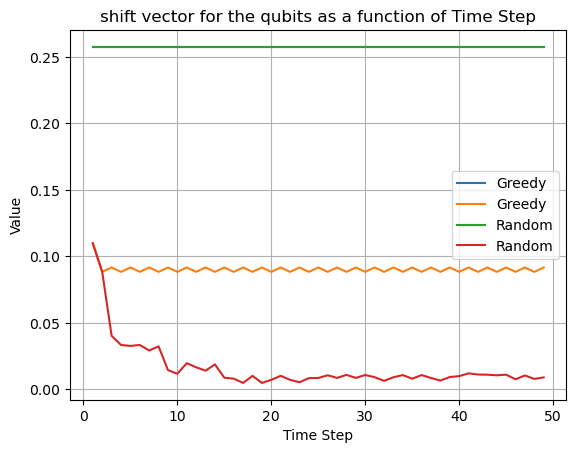

In [25]:
plot_lists_as_function_of_time(means_stds_of_pops_of_one_sim_index(popsgreedy,1),
means_stds_of_pops_of_one_sim_index(popsrandom,1))

In [10]:
Trials = 2
for unitary_seed in range(Trials):
    initial_pops = [0.1,.2]
    system = DM.n_thermal_qbits(initial_pops)
    connectivity = "gas"
    unitary_energy_subspace = 1
    ordering_seed = 1
    chunk_size = 2
    order_rule_name = "random"
    num_steps =10
    data = cleo.execute(file_name="random",
                       connectivity=connectivity,
                       order_rule_name = order_rule_name, 
                       unitary_seed=unitary_seed,
                       unitary_energy_subspace=unitary_energy_subspace,
                       evolution_generation_type="haar2Qunitary",
                       chunk_size=chunk_size,
                       num_steps=num_steps,
                       initial_pops=initial_pops,
                       verbosity = .9)

90%
simulation complete, extracting and saving data to : ../data/random/random-2_qubits-gas_connectivity-unitary_energy_subspace_1-unitary_seed_0-order_rule_name_random
simulation complete, extracting and saving data to : ../data/random/random-2_qubits-gas_connectivity-unitary_energy_subspace_1-unitary_seed_0-order_rule_name_random
simulation complete, extracting and saving data to : ../data/random/random-2_qubits-gas_connectivity-unitary_energy_subspace_1-unitary_seed_0-order_rule_name_random
90%
simulation complete, extracting and saving data to : ../data/random/random-2_qubits-gas_connectivity-unitary_energy_subspace_1-unitary_seed_1-order_rule_name_random
simulation complete, extracting and saving data to : ../data/random/random-2_qubits-gas_connectivity-unitary_energy_subspace_1-unitary_seed_1-order_rule_name_random
simulation complete, extracting and saving data to : ../data/random/random-2_qubits-gas_connectivity-unitary_energy_subspace_1-unitary_seed_1-order_rule_name_random


In [12]:
import sys as SYS; SYS.path.insert(0, '../..')
from Scripts import hdf5merge
hdf5merge.merge_hdf5_files("../data/random")

In [16]:
newdata1 = dict(h5py.File("../data/random/random.hdf5"))

In [20]:
popsrandom = get_pops(newdata1,2,"gas","random")

In [21]:
popsrandom[1]

array([[0.09999999, 0.2       ],
       [0.14999999, 0.14999999],
       [0.09999999, 0.19999999],
       [0.14999999, 0.14999999],
       [0.10000001, 0.19999997],
       [0.14999999, 0.14999999],
       [0.10000001, 0.19999997],
       [0.14999999, 0.14999999],
       [0.19999997, 0.10000001],
       [0.14999999, 0.14999999]], dtype=float32)

In [22]:
0.1*0.5 + 0.2*0.5

0.15000000000000002